# **A Predictive Analysis of Heart Disease**

ADS 599 | Team 3 | Anusia Edward & Saba Alemayehu

In [2]:
!pip uninstall kaleido

In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:20
🔁 Restarting kernel...


In [ ]:
!conda install -c conda-forge python-kaleido

# **Table of Contents:**

>[A Predictive Analysis of Heart Disease](#scrollTo=vbomqAF_uHfS)

>>[Preprocessing and Explanatory Data Analysis (EDA)](#scrollTo=0yeZ5tliunSq)

>>[Modeling and Evaluations](#scrollTo=FCYQAdPEuv0f)

>>>[Model 1: Logistic Regression](#scrollTo=8xVD6TRsXvx2)

>>>[Model 2: Naive Bayes](#scrollTo=Jgcp18KaXxyO)

>>>[Model 3: Neural Network](#scrollTo=gcCVDeOiXzwP)

>>>[Model 4: Decision Tree](#scrollTo=P-EGjzJpX2AD)

>>>[Model 5: Random Forest](#scrollTo=12IQDjr6X4GW)

>>>[Model 6: K-Nearest Neighbor (KNN)](#scrollTo=hZl3WcaTX6Gh)

>>>[Model 7: Linear Discriminant Analysis (LDA)](#scrollTo=wPgkEgL7X_N4)

>>[References](#scrollTo=z9aI711yalFu)



In [3]:
# Necessary Imports
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score,
classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (RepeatedStratifiedKFold,
                                     GridSearchCV,cross_val_score)
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

## **Preprocessing and Explanatory Data Analysis (EDA)**

In [4]:
# Loading in the Data
heart_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_2020i.csv')

In [5]:
# Visualizing the Data
heart_df.head(3)

,Unnamed: 0,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,311689,31.01,No,No,No,1,0,No,Male,60-64,White,No,Yes,Good,6,No,No,No,No
1,78443,25.09,Yes,No,Yes,15,15,No,Male,65-69,White,No,Yes,Fair,7,No,Yes,Yes,No
2,49511,38.52,No,Yes,No,0,0,No,Male,50-54,White,No,Yes,Good,5,No,No,No,No


Upon initial investigation of this dataset there are a few things that standout. First, there are a lot of variables that are binary in text format. For example, the target variable of ‘HeartDisease’ is a binary variable include ‘yes’ or ‘no’ responses. This will need to be transformed into numeric binary values of 0 and 1. The numeric values will need to be checked for outliers and possible normalized. Further inspection into the data will need to be conducted in order to identify any other corrections.

In [6]:
# Size of Data
heart_df.shape

(19188, 19)

There are a total of eighteen features (the nineteenth feature contains IDs) and 19188 records within this dataset.

The next step is to determine the missing values by employing the following function: {dataframe name}.isnull().sum(). The .isnull() part of the function determines which records are null records, while the .sum() part of the function returns the number of null records.

In [7]:
# Checking for Missing Variables
heart_df.isnull().sum()

Unnamed: 0          0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
HeartDisease        0
dtype: int64

Additionally, through matplotlib’s plt.figure function, a heatmap of the missing values was visualized. Through these functions it was determined that there were no missing values within the data.


<Figure size 600x600 with 0 Axes>

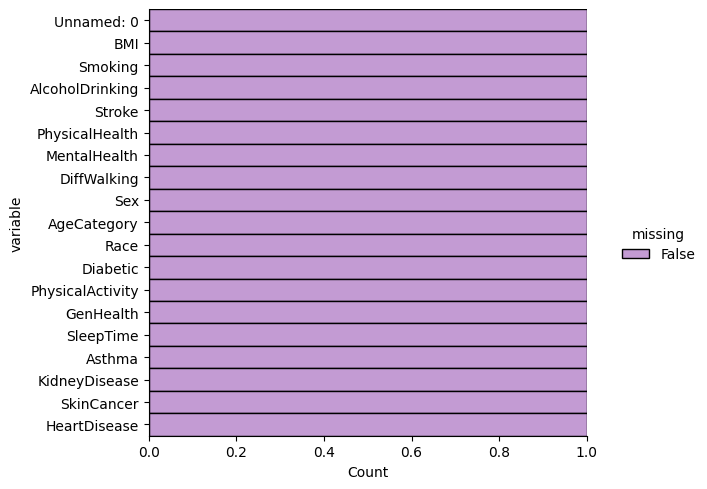

In [8]:
# Visualizing Missing Variables through Heat Map
plt.figure(figsize=(6,6))
sns.displot(
    data= heart_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    palette=["#C39BD3"],
    alpha=1,
    multiple="fill",
    aspect=1.25
)
plt.show()

Essentially, there are no missing values present within the data. This indicates that no filling of missing variables through imputations are necessary. If there were missing values it could have been addressed through a KNN imputation.

After the checking of missing values, the next step was determining if there were any inconsistent entries or duplicate entries. This was determined by using the following function: {dataframe name}.unique(). This function aided with determining if there were any inconsistencies within the data as well as any duplicate entries.

In [9]:
# Checking Unique Values for Each Variable
print('HeartDisease', heart_df['HeartDisease'].unique())
print('BMI', heart_df['BMI'].unique())
print('Smoking', heart_df['Smoking'].unique())
print('AlcoholDrinking', heart_df['AlcoholDrinking'].unique())
print('Stroke', heart_df['Stroke'].unique())
print('PhysicalHealth', heart_df['PhysicalHealth'].unique())
print('MentalHealth', heart_df['MentalHealth'].unique())
print('DiffWalking', heart_df['DiffWalking'].unique())
print('Sex', heart_df['Sex'].unique())
print('AgeCategory', heart_df['AgeCategory'].unique())
print('Race', heart_df['Race'].unique())
print('Diabetic', heart_df['Diabetic'].unique())
print('PhysicalActivity', heart_df['PhysicalActivity'].unique())
print('GenHealth', heart_df['GenHealth'].unique())
print('SleepTime', heart_df['SleepTime'].unique())
print('Asthma', heart_df['Asthma'].unique())
print('KidneyDisease', heart_df['KidneyDisease'].unique())
print('SkinCancer', heart_df['SkinCancer'].unique())

HeartDisease ['No' 'Yes']
BMI [31.01 25.09 38.52 ... 18.18 30.84 39.27]
Smoking ['No' 'Yes']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
PhysicalHealth [ 1 15  0  2  3 14 30  5  7 21  8 20 10  4  6  9 28 25 29 12 24 16 17 13
 27 18 19 26 11 22 23]
MentalHealth [ 0 15  1  2  5 30  7  6 10  3  4 20 11 24 25  8 19 23 14 29 12 22  9 21
 28 18 13 16 17 26 27]
DiffWalking ['No' 'Yes']
Sex ['Male' 'Female']
AgeCategory ['60-64' '65-69' '50-54' '55-59' '35-39' '75-79' '70-74' '30-34' '45-49'
 '18-24' '40-44' '25-29' '80 or older']
Race ['White' 'Hispanic' 'Black' 'Other' 'Asian'
 'American Indian/Alaskan Native']
Diabetic ['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ['Yes' 'No']
GenHealth ['Good' 'Fair' 'Very good' 'Excellent' 'Poor']
SleepTime [ 6  7  5  4  8  9 12 10  3  2 15  1 18 24 11 16 14 20 13 19 22]
Asthma ['No' 'Yes']
KidneyDisease ['No' 'Yes']
SkinCancer ['No' 'Yes']


Looking at the unique values for each of the variables gives us insights into what kind of cleaning will need to be done. The following variables will need to be made into biary 0,1 values from yes,no text: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, PhysicalActivity, Asthma, KidneyDisease, and SkinCancer. The following variables are the numeric variables that will need to be handled: BMI, PhysicalHealth, MentalHealth, and SleepTime. The following variables will need to handeled through dummy coding the text data: Race, Diabetic, and GenHealth.

The .nunique() function was used in order to get an idea of the different outcomes for each of the variables. This is important for determining the type of recoding that will need to take place for the categorical variables in terms of whether or not the categorical variables were binary, ordinal, or nominal.

In [10]:
heart_df.nunique()

Unnamed: 0          19188
BMI                  1847
Smoking                 2
AlcoholDrinking         2
Stroke                  2
PhysicalHealth         31
MentalHealth           31
DiffWalking             2
Sex                     2
AgeCategory            13
Race                    6
Diabetic                4
PhysicalActivity        2
GenHealth               5
SleepTime              21
Asthma                  2
KidneyDisease           2
SkinCancer              2
HeartDisease            2
dtype: int64

In order to further determine if any of the records within the data was duplicated the following function was employed: {dataframe name}.duplicated. There were no duplicates within the data that needed to be handled.


In [11]:
# Checking for Duplicates
heart_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19183    False
19184    False
19185    False
19186    False
19187    False
Length: 19188, dtype: bool

In the following step we are double checking the data types for each of the variables. This is an important step to ensure that the data type matches the acutal data. If the data type does not match with the actual data, then it will be difficult to carry out data transformations in the future.

In [12]:
# Checking Datatypes
heart_df.dtypes

Unnamed: 0            int64
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
HeartDisease         object
dtype: object

In order to determine the type of encoding that needed to be carried out, bar charts of each of the categorical variables were produced. The bar charts were produced using plotly’s go.Histogram function.

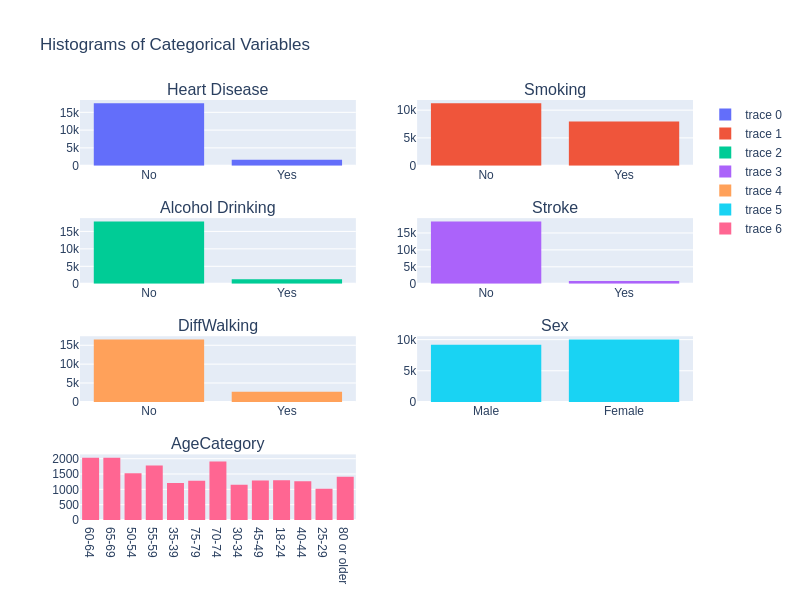

In [13]:
# Visualizing Categorical Variable Distributions (1-7)
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=("Heart Disease", "Smoking", "Alcohol Drinking",
                    "Stroke", "DiffWalking", "Sex", "AgeCategory"))
fig.add_trace(go.Histogram(x=heart_df['HeartDisease']),row=1, col=1)
fig.add_trace(go.Histogram(x=heart_df['Smoking']),row=1, col=2)
fig.add_trace(go.Histogram(x=heart_df['AlcoholDrinking']),row=2, col=1)
fig.add_trace(go.Histogram(x=heart_df['Stroke']),row=2, col=2)
fig.add_trace(go.Histogram(x=heart_df['DiffWalking']),row=3, col=1)
fig.add_trace(go.Histogram(x=heart_df['Sex']),row=3, col=2)
fig.add_trace(go.Histogram(x=heart_df['AgeCategory']),row=4, col=1)

fig.update_layout(height=600, width=800,
                  title_text="Histograms of Categorical Variables",
                  bargap=0.2)
fig.show("png")

The histograms seen above and below were created using plotly’s go.Histogram function.

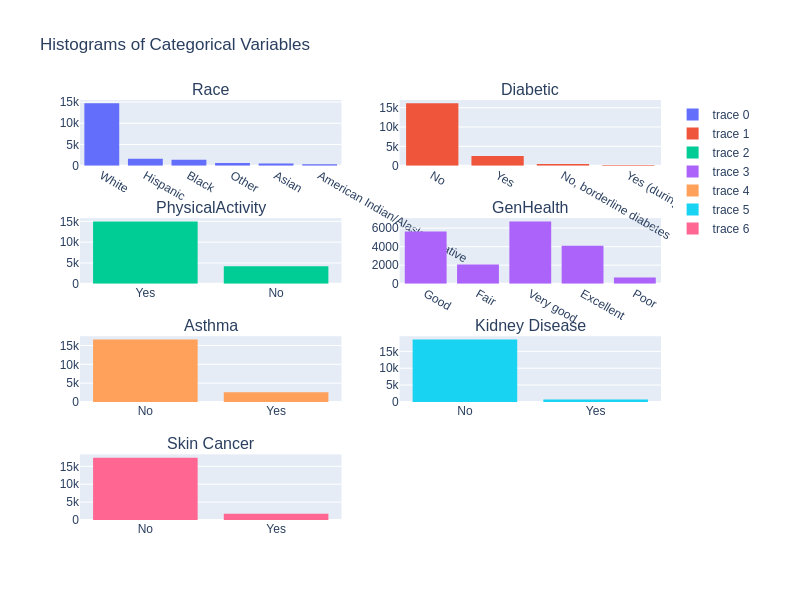

In [14]:
# Visualizing Categorical Variable Distributions (8-14)
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=("Race", "Diabetic", "PhysicalActivity",
                    "GenHealth", "Asthma", "Kidney Disease",
                    "Skin Cancer"))
fig.add_trace(go.Histogram(x=heart_df['Race']),row=1, col=1)
fig.add_trace(go.Histogram(x=heart_df['Diabetic']),row=1, col=2)
fig.add_trace(go.Histogram(x=heart_df['PhysicalActivity']),row=2, col=1)
fig.add_trace(go.Histogram(x=heart_df['GenHealth']),row=2, col=2)
fig.add_trace(go.Histogram(x=heart_df['Asthma']),row=3, col=1)
fig.add_trace(go.Histogram(x=heart_df['KidneyDisease']),row=3, col=2)
fig.add_trace(go.Histogram(x=heart_df['SkinCancer']),row=4, col=1)

fig.update_layout(height=600, width=800,
                  title_text="Histograms of Categorical Variables",
                  bargap=0.2)
fig.show("png")

Based on the bar charts, it was evident that the following variables were to be recorded using a binary encoder: heart_disease, smoking, alcohol_drinking, stroke, diff_walking, physical_activity, asthma, kisney_disease, skin_cancer, and sex.

The next step was the encoding of the categorical variables.

In [15]:
# Recoding Categorical Variables through Binary Encoder

# Heart Disease -> Target Variable
heart_df['heart_disease'] = heart_df['HeartDisease'].map({'Yes':1, 'No':0})

# Smoking
heart_df['smoking'] = heart_df['Smoking'].map({'Yes':1, 'No':0})

# Alcohol Drinking
heart_df['alcohol_drinking'] = heart_df['AlcoholDrinking'].map({'Yes':1,
                                                                'No':0})

# Stroke
heart_df['stroke'] = heart_df['Stroke'].map({'Yes':1, 'No':0})

# Difficulty Walking
heart_df['diff_walking'] = heart_df['DiffWalking'].map({'Yes':1, 'No':0})

# Physical Activity
heart_df['physical_activity'] = heart_df['PhysicalActivity'].map({'Yes':1,
                                                                  'No':0})

# Asthma
heart_df['Asthma'] = heart_df['Asthma'].map({'Yes':1, 'No':0})

# Kidney Disease
heart_df['kidney_disease'] = heart_df['KidneyDisease'].map({'Yes':1, 'No':0})

# Skin Cancer
heart_df['skin_cancer'] = heart_df['SkinCancer'].map({'Yes':1, 'No':0})

# Sex
heart_df['sex_female'] = heart_df['Sex'].map( {'Male':0, 'Female':1} )

The binary encoder transformed the ‘yes’ and ‘no’ responses into 1 and 0. The following function was used to recode these variables: {dataframe name}[{variable name}] = {dataframe name}[‘column name’].map({‘Yes’:1, ‘No’:0}). Essentially the .map() function was employed onto the column within the dataframe to change all the ‘Yes’ responses into 1 and ‘No’ responses into 0. This is an important step, as not all machine learning algorithms can operate on labeled data directly (Bhattacharyya, 2020). Instead, machine learning models need data to be transformed into numeric values.

The next step is to dummy code the following variables: age, race, diabetic, and general health. These attribues are nominal so it is important that pandas' get_dummies function is employed.

In [16]:
# Dummy Coding Categorical Variables

# Age
heart = pd.concat([heart_df, pd.get_dummies(heart_df['AgeCategory'],
                                           prefix='age')], axis=1)
# Race
heart = pd.concat([heart, pd.get_dummies(heart['Race'],
                                           prefix='race')], axis=1)
# Diabetic
heart = pd.concat([heart, pd.get_dummies(heart['Diabetic'],
                                           prefix='diabetic')], axis=1)
# GenHealth
heart = pd.concat([heart, pd.get_dummies(heart['GenHealth'],
                                           prefix='genhealth')], axis=1)

In [17]:
# checking the recoding results
heart.head(3)

,Unnamed: 0,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy),genhealth_Excellent,genhealth_Fair,genhealth_Good,genhealth_Poor,genhealth_Very good
0,311689,31.01,No,No,No,1,0,No,Male,60-64,...,1,1,0,0,0,0,0,1,0,0
1,78443,25.09,Yes,No,Yes,15,15,No,Male,65-69,...,1,1,0,0,0,0,1,0,0,0
2,49511,38.52,No,Yes,No,0,0,No,Male,50-54,...,1,1,0,0,0,0,0,1,0,0


Following this step, dimensionality reduction was conducted. Dimensionality reduction is an important step in data cleaning as it aids with removing any unnecessary noise that can hinder the predictability of the model that is to be produced later on (Raj, 2021). This was conducted by removing any unnecessary columns. For example, the columns that were used to create a binary encoded version of the information were no longer necessary and therefore removed using the .drop() function as seen below.

In [19]:
# Dropping Unecessary Variables
heart.drop(['Unnamed: 0','HeartDisease', 'Smoking', 'AlcoholDrinking',
               'Stroke', 'DiffWalking', 'Sex',
               'PhysicalActivity', 'Asthma',
               'KidneyDisease', 'SkinCancer',
            'AgeCategory', 'Race', 'Diabetic', 'GenHealth'], axis=1,
           inplace=True)

In [20]:
#list(heart.columns)

Reformatting, in terms of renaming the variables for clarity, was also carried out in the next step below.

In [21]:
# Renaming Variables for Clarity
heart.rename(columns = {'age_18-24':'age_18'}, inplace = True)
heart.rename(columns = {'age_25-29':'age_25'}, inplace = True)
heart.rename(columns = {'age_30-34':'age_30'}, inplace = True)
heart.rename(columns = {'age_35-39':'age_35'}, inplace = True)
heart.rename(columns = {'age_40-44':'age_40'}, inplace = True)
heart.rename(columns = {'age_45-49':'age_45'}, inplace = True)
heart.rename(columns = {'age_50-54':'age_50'}, inplace = True)
heart.rename(columns = {'age_55-59':'age_55'}, inplace = True)
heart.rename(columns = {'age_60-64':'age_60'}, inplace = True)
heart.rename(columns = {'age_65-69':'age_65'}, inplace = True)
heart.rename(columns = {'age_70-74':'age_70'}, inplace = True)
heart.rename(columns = {'age_75-79':'age_75'}, inplace = True)
heart.rename(columns = {'age_80 or older':'age_80'}, inplace = True)
heart.rename(columns = {'race_American Indian/Alaskan Native':'race_native'},
             inplace = True)
heart.rename(columns = {'diabetic_No, borderline diabetes':'diabetic_no_b'},
             inplace = True)
heart.rename(columns = {'diabetic_Yes (during pregnancy)':'diabetic_yes_preg'},
             inplace = True)

In [22]:
# Rechecking Results
heart.head(3)

,BMI,PhysicalHealth,MentalHealth,SleepTime,heart_disease,smoking,alcohol_drinking,stroke,diff_walking,physical_activity,...,race_White,diabetic_No,diabetic_no_b,diabetic_Yes,diabetic_yes_preg,genhealth_Excellent,genhealth_Fair,genhealth_Good,genhealth_Poor,genhealth_Very good
0,31.01,1,0,6,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1,25.09,15,15,7,0,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,0
2,38.52,0,0,5,0,0,1,0,0,1,...,1,1,0,0,0,0,0,1,0,0


In [ ]:
# Descriptive Stats for Numeric Variables
heart[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


From the seventeen independent variables, four were identified as quantitative variables. The four variables are as follows: BMI, PhysicalHealth, MentalHealth, and SleepTime. The descriptive statistics for each of the quantitative variables can be seen above. In the table above, the mean, standard deviation, minimum, first quartile value, median, third quartile value, maximum, and total count were included. From the table, the average BMI among the study’s participants was approximately 28.3. It should be noted that BMI is broken down into three categories. The three categories are as follows: healthy weight (18.5-24.9), overweight (25.0 - 29.9), and obese (30.0+) (All about adult BMI, 2022). Based on this, it can be determined that the average participant of this study would be classified as overweight. Another interesting insight to note is that the average participant had approximately seven hours of sleep, with the minimum amount of recorded sleep time being an hour. Additionally, participants' physical and mental health could be considered as well, as out of a thirty day period it was reported on average that they experienced approximately three poor physical or mental health days.

Following this, the next step in the data cleaning process was to look into the necessary transformations that would need to be carried out. In order to do this, histograms and boxplots of the numeric variables were produced.

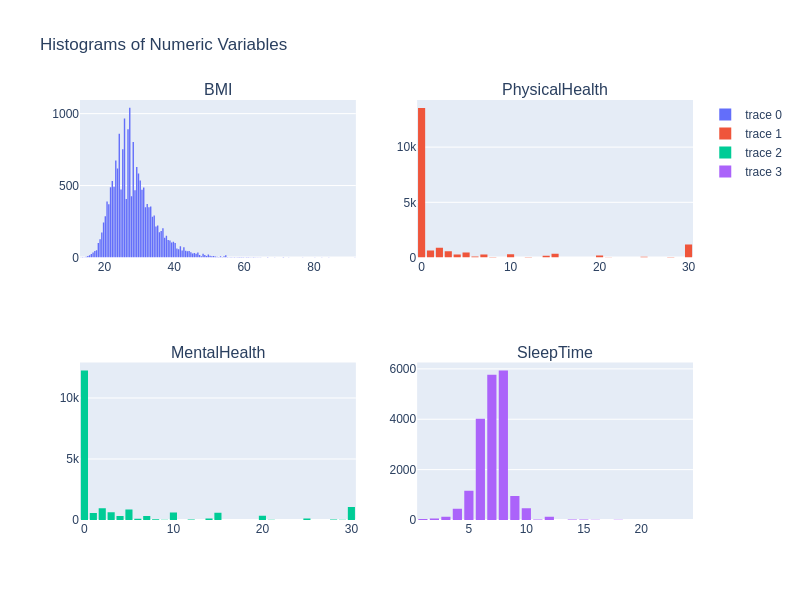

In [23]:
# Visualizing Numeric Variables Distributions
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("BMI", "PhysicalHealth", "MentalHealth",
                    "SleepTime"))
fig.add_trace(go.Histogram(x=heart['BMI']),row=1, col=1)
fig.add_trace(go.Histogram(x=heart['PhysicalHealth']),row=1, col=2)
fig.add_trace(go.Histogram(x=heart['MentalHealth']),row=2, col=1)
fig.add_trace(go.Histogram(x=heart['SleepTime']),row=2, col=2)

fig.update_layout(height=600, width=800,
                  title_text="Histograms of Numeric Variables",
                  bargap=0.2)
fig.show("png")

The results obtained from the histograms indicated that BMI, PhysicalHealth, and MentalHealth are heavily right skewed. The variable SleepTime is slightly right skewed. In other words, the mean overestimates the most common values.

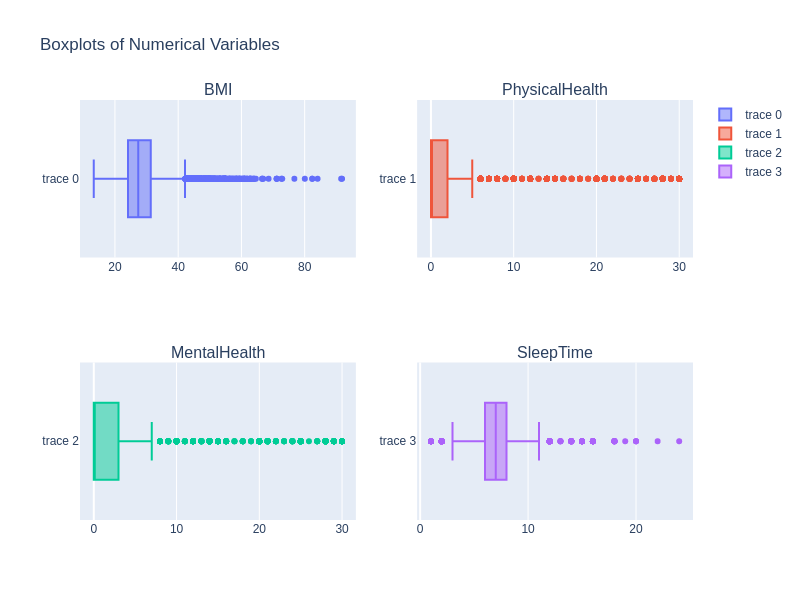

In [24]:
# Boxplots of Numeric Variables
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("BMI", "PhysicalHealth", "MentalHealth",
                    "SleepTime"))
fig.add_trace(go.Box(x=heart['BMI']),row=1, col=1)
fig.add_trace(go.Box(x=heart['PhysicalHealth']),row=1, col=2)
fig.add_trace(go.Box(x=heart['MentalHealth']),row=2, col=1)
fig.add_trace(go.Box(x=heart['SleepTime']),row=2, col=2)
fig.update_layout(height=600, width=800,
                  title_text="Boxplots of Numerical Variables")
fig.show("png")

Boxplots were produced to visualize outliers. This step was necessary in order to determine if transformations, in terms of handling outliers, were necessary. When looking at the boxplots produced, it is evident that the following variables had outliers: BMI, PhysicalHealth, MentalHealth and SleepTime. In terms of BMI, the maximum value was noted to be 12 while the minimum value was noted to be 94. A BMI value of 12 indicates an underweight person while a BMI value of 94 indicates an overweight person. Both values are plausible and therefore the outliers for this variable were determined to be kept. When looking at the outliers for PhysicalHealth, it included values within the range of thirty. A value of thirty makes sense as the scale was determined to be how many days a person had physical health problems in the span of thirty days. The same can be stated for the MentalHealth variable. In terms of SleepTime, the recorded times were within the 24 hour time period, which makes sense within the context of this study, and therefore was retained. Essentially, the outliers for each of these variables made sense within the context of this study and therefore were retained.


<Axes: >

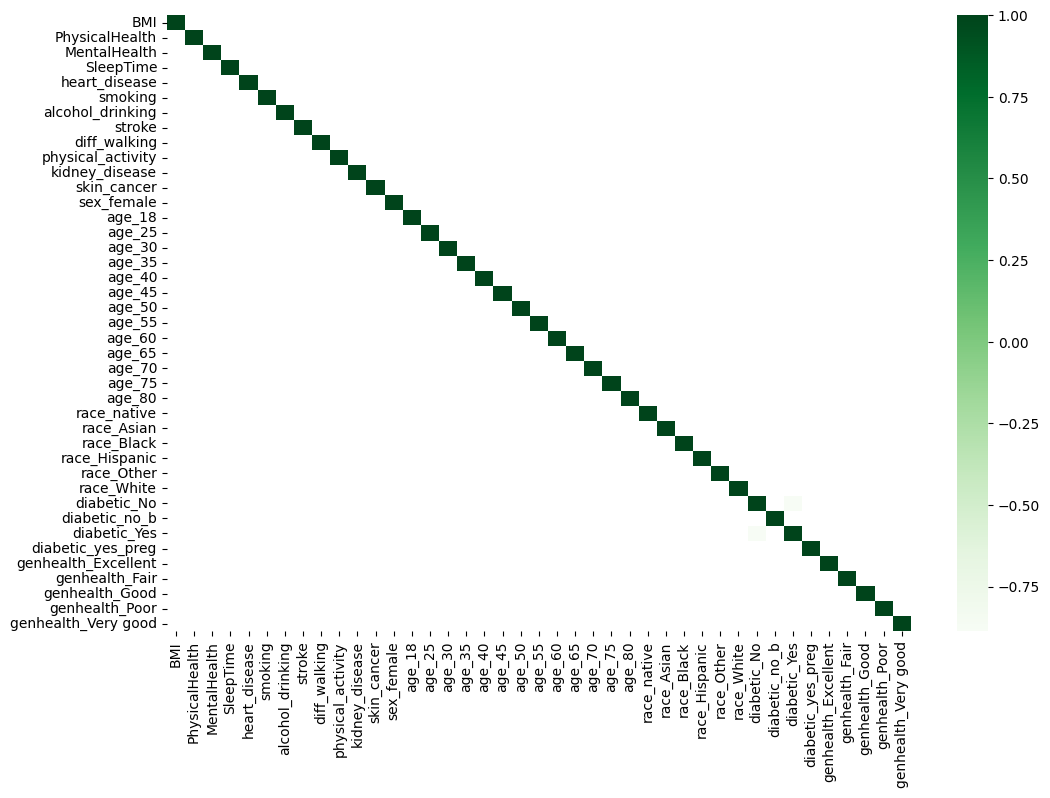

In [25]:
# Checking for Multicollinearity
corr = heart.corr()
kot = corr[abs(corr) >= 0.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

There are no concerns of multicollinearity that need to be addressed as seen through the visualization above. The code was set up in such a way that if there was a correlation value greater than 0.6 it would appear as a colored square. Considering that there are no colored squares (aside from correlation amongst the same feature), it can be asserted that there are no concerns of multicollinearity.

In [26]:
# Splitting the data 80-20 Split + Stratification on heart_disease
x = heart.loc[:, heart.columns !="heart_disease"]
y = heart['heart_disease']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,
                                                    test_size=0.20,
                                                    random_state=42)

In [27]:
# Checking the Dimensions
print('x_train:', x_train.shape, 'y_train:',y_train.shape)
print('x_test:', x_test.shape, 'y_test', y_test.shape)

x_train: (15350, 40) y_train: (15350,)
x_test: (3838, 40) y_test (3838,)


In [28]:
# Normalizing the Numeric Data Based on the Train
scaler = preprocessing.StandardScaler()
scaler.fit(x_train[["BMI", "PhysicalHealth", "MentalHealth",
                    "SleepTime"]])
tNorm = pd.concat([pd.DataFrame(scaler.transform(heart[["BMI", "PhysicalHealth",
                                                        "MentalHealth",
                                                        "SleepTime"]]),
                                 columns=["z_BMI", "z_PhysicalHealth",
                                                        "z_MentalHealth",
                                                        "z_SleepTime"]),
                   heart[['heart_disease','smoking','alcohol_drinking','stroke',
                          'diff_walking','physical_activity','kidney_disease',
                          'skin_cancer','sex_female','age_18','age_25','age_30',
                          'age_35','age_40','age_45','age_50','age_55','age_60',
                          'age_65','age_70','age_75','age_80','race_native',
                          'race_Asian','race_Black','race_Hispanic',
                          'race_Other','race_White','diabetic_No',
                          'diabetic_no_b','diabetic_Yes','diabetic_yes_preg',
                          'genhealth_Excellent','genhealth_Fair',
                          'genhealth_Good','genhealth_Poor',
                          'genhealth_Very good']]],axis=1)

In [29]:
# setting the normalized using the index
trainNorm = tNorm.iloc[x_train.index]
testNorm = tNorm.iloc[x_test.index]

In [30]:
# adjusting the sets to have the normalized data
x_train = trainNorm[['z_BMI', 'z_PhysicalHealth','z_MentalHealth','z_SleepTime',
                     'smoking','alcohol_drinking','stroke',
                          'diff_walking','physical_activity','kidney_disease',
                          'skin_cancer','sex_female','age_18','age_25','age_30',
                          'age_35','age_40','age_45','age_50','age_55','age_60',
                          'age_65','age_70','age_75','age_80','race_native',
                          'race_Asian','race_Black','race_Hispanic',
                          'race_Other','race_White','diabetic_No',
                          'diabetic_no_b','diabetic_Yes','diabetic_yes_preg',
                          'genhealth_Excellent','genhealth_Fair',
                          'genhealth_Good','genhealth_Poor',
                          'genhealth_Very good']]
x_test = testNorm[['z_BMI', 'z_PhysicalHealth','z_MentalHealth','z_SleepTime',
                     'smoking','alcohol_drinking','stroke',
                          'diff_walking','physical_activity','kidney_disease',
                          'skin_cancer','sex_female','age_18','age_25','age_30',
                          'age_35','age_40','age_45','age_50','age_55','age_60',
                          'age_65','age_70','age_75','age_80','race_native',
                          'race_Asian','race_Black','race_Hispanic',
                          'race_Other','race_White','diabetic_No',
                          'diabetic_no_b','diabetic_Yes','diabetic_yes_preg',
                          'genhealth_Excellent','genhealth_Fair',
                          'genhealth_Good','genhealth_Poor',
                          'genhealth_Very good']]

In [31]:
# checking the dimensions to ensure normalization was done correctly
print('x_train:', x_train.shape, 'y_train:',y_train.shape)
print('x_test:', x_test.shape, 'y_test', y_test.shape)

x_train: (15350, 40) y_train: (15350,)
x_test: (3838, 40) y_test (3838,)


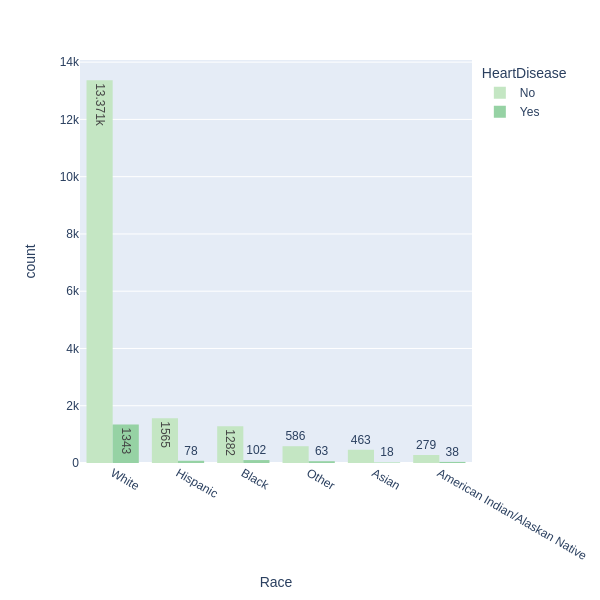

In [32]:
# Race by HeartDisease
fig = px.histogram(heart_df,x ='Race',color='HeartDisease',
              barmode='group',text_auto=True,
              color_discrete_sequence=px.colors.sequential.Blugrn,
             width=600, height=600)
fig.show("png")

A bar chart of the frequency of heart disease versus non heart disease patients by race was visualized above. This visualization was created using plotly’s px.histogram function. It should be noted that for the purposes of the study, the respondents were categorized by the following racial categories: White, Black, Asian, American Indian/Alaskan Native, Other, and Hispanic. When observing the visualization, it is evident that the majority of respondents are primarily White. The racial group that is most affected by heart disease is the American Indian/Alaskan Native populations. This was determined by calculating the proportion of heart disease individuals to the total population within the respective races.

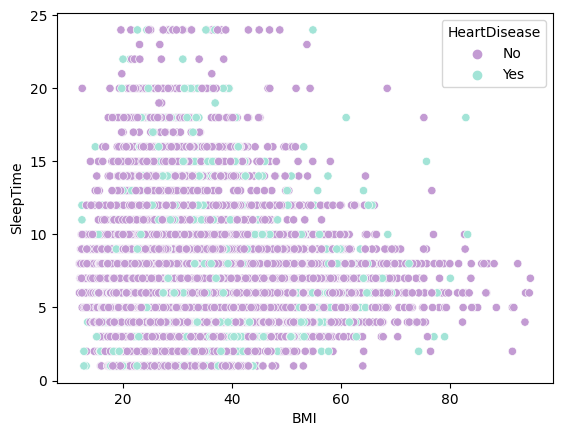

In [ ]:
# BMI vs Sleep Time by Heart Disease
sns.scatterplot(data=heart_df, x="BMI", y="SleepTime", hue="HeartDisease",
                palette = ["#C39BD3", "#A3E4D7"]);

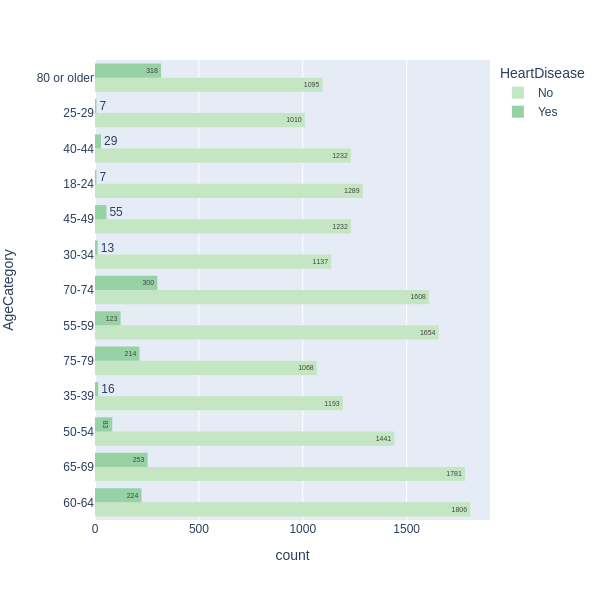

In [33]:
# Age by HeartDisease
fig = px.histogram(heart_df,y ='AgeCategory',color='HeartDisease',
              barmode='group',text_auto=True,
              color_discrete_sequence=px.colors.sequential.Blugrn,
             width=600, height=600)
fig.show("png")

A bar chart of the frequency of heart disease by age group was produced using plotly’s px.histogram function as seen above. Through this visualization, it can be seen that the group that is most affected by heart disease are those that are in their late sixties. More specifically, those in the age range of 65 to 69 have the highest risk for heart disease. The second most at-risk group for heart disease are those within the age range of 75 to 79 years of age. The least at-risk group of individuals for heart disease are those within the age range of 18 to 24 years of age.


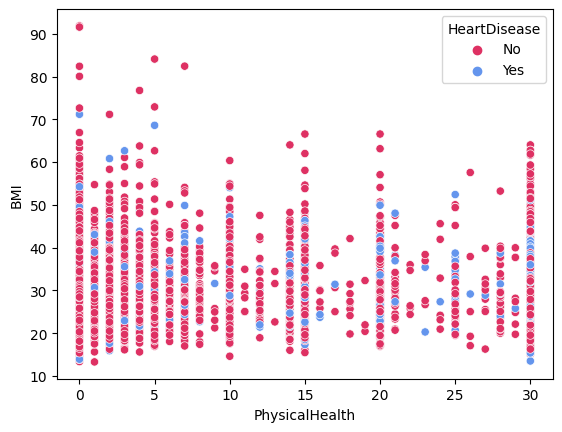

In [34]:
# Physical Health vs BMI by Heart Disease
sns.scatterplot(data=heart_df, x="PhysicalHealth", y="BMI",
                hue="HeartDisease",
                palette = ["#DE3163", "#6495ED"]);

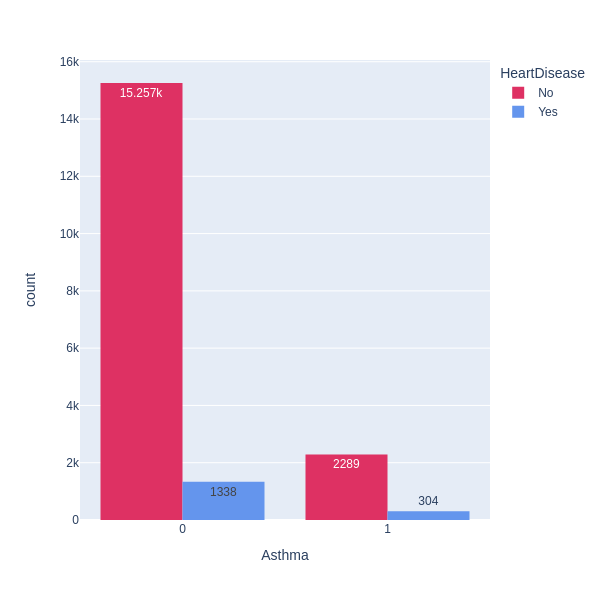

In [35]:
# Asthma by HeartDisease
fig = px.histogram(heart_df, x ='Asthma',color='HeartDisease',
              barmode='group',text_auto=True,
              color_discrete_sequence=["#DE3163", "#6495ED"],
             width=600, height=600)
fig.show("png")

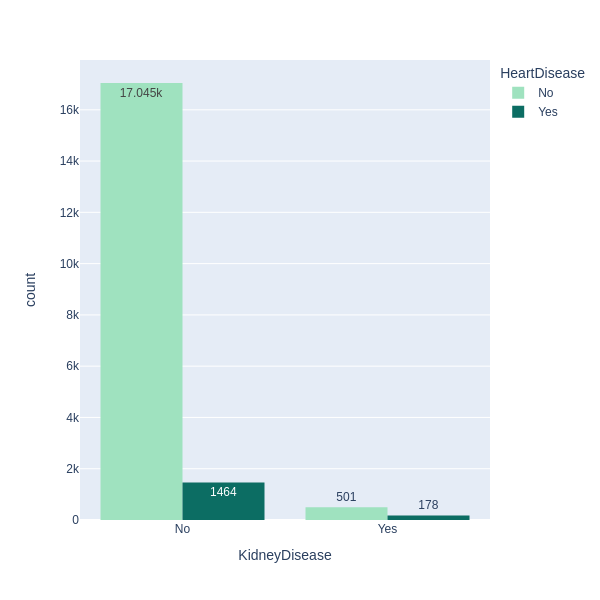

In [36]:
# Kidney Disease by HeartDisease
fig = px.histogram(heart_df, x ='KidneyDisease',color='HeartDisease',
              barmode='group',text_auto=True,
              color_discrete_sequence=["#9FE2BF", "#0c6d63"],
             width=600, height=600)
fig.show("png")

When looking at a bar chart of the frequency of heart disease, by whether or not a person has kidney disease, it was evident that those who had kidney disease had the higher risk for heart disease (as seen in the figure above). This was determined by calculating the total number of respondents with heart disease for respondents with and without kidney disease and dividing those values by the total number of non kidney disease respondents and kidney disease respondents, respectively. Through these calculations, it was determined that seven percent of those without kidney disease had heart disease, while twenty-nine percent of those with kidney disease had heart disease. This visualization was created using plotly’s px.histogram function.


## **Modeling and Evaluations**

Variables to Use:
*   x_train
*   y_train
*   x_test
*   y_test

### Model 1: Logistic Regression

Best: 0.916200 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3510
           1       0.80      0.04      0.07       328

    accuracy                           0.92      3838
   macro avg       0.86      0.52      0.51      3838
weighted avg       0.91      0.92      0.88      3838



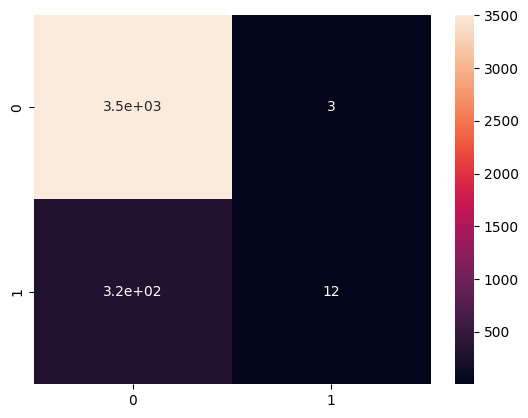

In [37]:
# Logistic Regression
# define models and parameters
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Predicting on the test data
lr_pred = grid_result.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, lr_pred))



Text(0, 0.5, 'True positive rate')

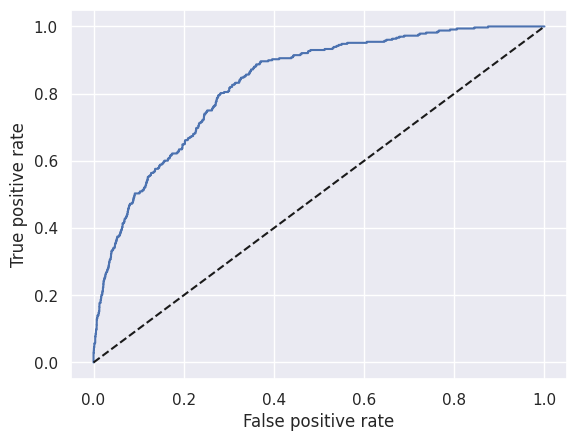

In [38]:
# plot roc curve
y_pred_proba = grid_result.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 2: Naive Bayes

              precision    recall  f1-score   support

           0       0.98      0.70      0.81      3510
           1       0.20      0.81      0.32       328

    accuracy                           0.71      3838
   macro avg       0.59      0.76      0.57      3838
weighted avg       0.91      0.71      0.77      3838



Text(0, 0.5, 'True positive rate')

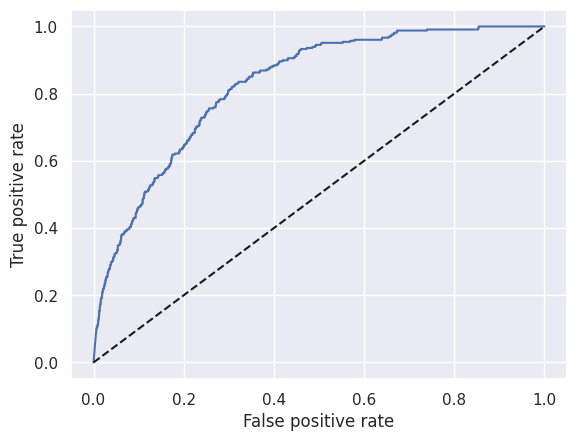

In [39]:
# Naive Bayes - Gaussian Classifier
gnb = GaussianNB()
# Model training
gnb.fit(x_train, y_train)

# Predict Output
gnb_pred = gnb.predict(x_test)

# Classification report
print(classification_report(y_test, gnb_pred))

# plot roc curve
y_pred_proba = gnb.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3510
           1       0.32      0.48      0.38       328

    accuracy                           0.87      3838
   macro avg       0.63      0.69      0.66      3838
weighted avg       0.90      0.87      0.88      3838



Text(0, 0.5, 'True positive rate')

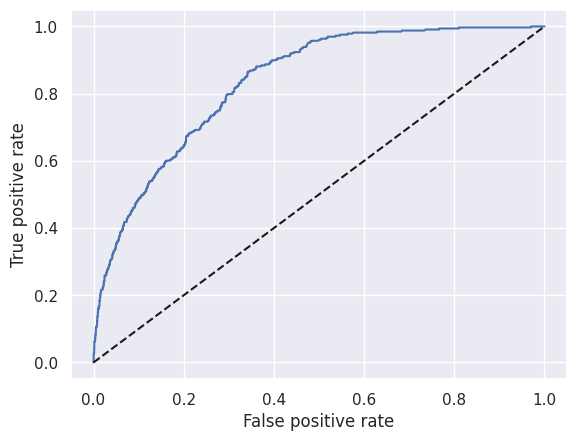

In [40]:
# Naive Bayes - Bernoulli Classifier
bnb = BernoulliNB()
# Model training
bnb.fit(x_train, y_train)

# Predict Output
bnb_pred = bnb.predict(x_test)

# Classification report
print(classification_report(y_test, bnb_pred))

# plot roc curve
y_pred_proba = bnb.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 3: Neural Network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
480/480 [==============================] - 2s 3ms/step - loss: 0.3321 - accuracy: 0.8958 - val_loss: 0.2434 - val_accuracy: 0.9145
Epoch 2/40
480/480 [==============================] - 1s 2ms/step - loss: 0.2437 - accuracy: 0.9143 - val_loss: 0.2294 - val_accuracy: 0.9148
Epoch 3/40
480/480 [==============================] - 1s 2ms/step - loss: 0.2358 - accuracy: 0.9154 - val_loss: 0.2248 - val_accuracy: 0.9158
Epoch 4/40
480/480 [========

<Axes: >

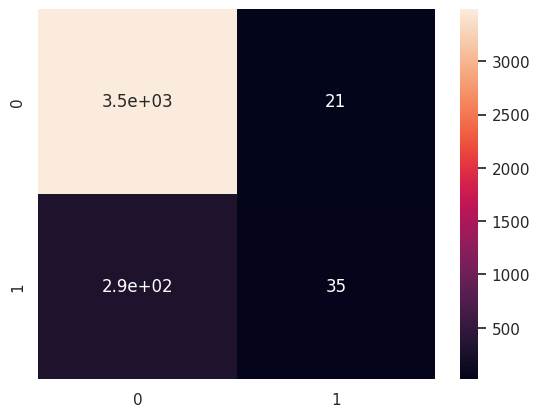

In [41]:
# Neural Network

NN = Sequential()
NN.add(Dense(8, activation='relu', input_dim=40))
NN.add(Dense(1, activation='sigmoid'))
NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NN.summary()
hist = NN.fit(x_train, y_train, validation_data=(x_test, y_test),
              epochs=40, batch_size=32)

#validate the model
nn_pred=NN.predict(x_test)> 0.5

# Classification report
print(classification_report(y_test, nn_pred))

# Confusion matrix
cm = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm, annot=True)


### Model 4: Decision Tree

In [43]:
#optimizing decision tree depth
score = []
for i in range(1,12):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(x_train,y_train)
    y_pred = dtree.predict(x_test)
    score.append(round(accuracy_score(y_test,y_pred),4))
print("Maximum depth", score.index(max(score)))
print( "Maximum score", max(score))


Maximum depth 2
Maximum score 0.9158


0.914538822303283
[[3510    0]
 [ 328    0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      3510
           1       0.00      0.00      0.00       328

    accuracy                           0.91      3838
   macro avg       0.46      0.50      0.48      3838
weighted avg       0.84      0.91      0.87      3838



Text(0, 0.5, 'True positive rate')

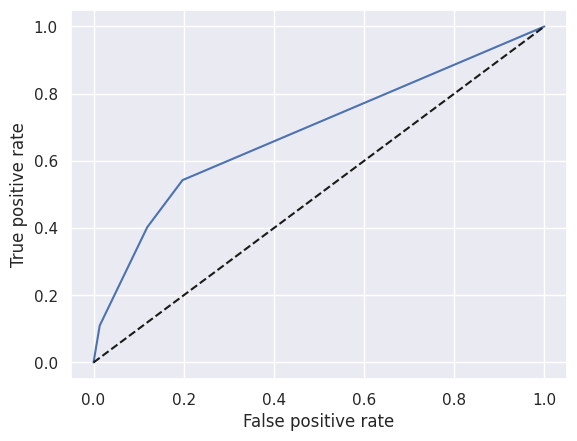

In [44]:
# Decision Tree

dt = DecisionTreeClassifier(max_depth = 2, random_state = 599)
dt.fit(x_train,y_train)

#validate the model
dt_pred=dt.predict(x_test)
print(accuracy_score(y_test, dt_pred))

#Confusion matrix
cm=confusion_matrix(y_test,dt_pred)
print(cm)

# Classification report
print(classification_report(y_test, dt_pred))

# plot roc curve
y_pred_proba = dt.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


### Model 5: Random Forest

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3510
           1       0.83      0.03      0.06       328

    accuracy                           0.92      3838
   macro avg       0.88      0.51      0.51      3838
weighted avg       0.91      0.92      0.88      3838



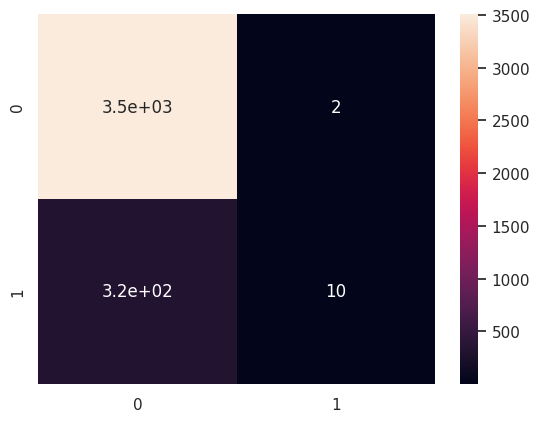

In [45]:
#  Random Forest

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# define model
rf=RandomForestClassifier(random_state = 599)
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)

rf_grid.fit(x_train, y_train)

#validate the model
rf_pred = rf_grid.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, rf_pred))


Text(0, 0.5, 'True positive rate')

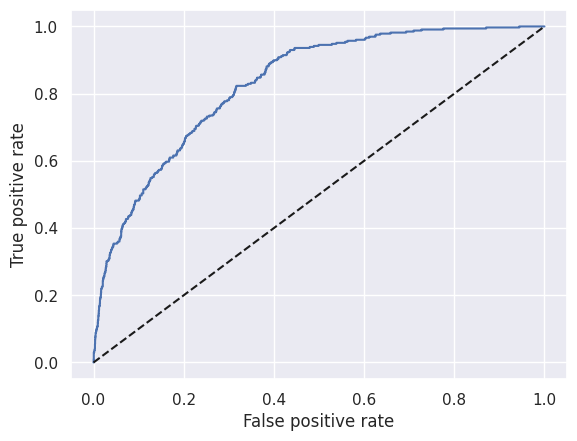

In [46]:
# plot roc curve for random forest
y_pred_proba = rf_grid.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 6: K-Nearest Neighbor (KNN)

In [47]:
# K-Nearest Neighbor (KNN)
grid_params = { 'n_neighbors' : [3,5,7,9],
               'metric' : ['euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3,
                  n_jobs = -1)
# fit the model on our train set
g_res = gs.fit(x_train, y_train)
# find the best score
g_res.best_score_
# get the hyperparameters with the best score
g_res.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'metric': 'euclidean', 'n_neighbors': 9}

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3510
           1       0.60      0.05      0.08       328

    accuracy                           0.92      3838
   macro avg       0.76      0.52      0.52      3838
weighted avg       0.89      0.92      0.88      3838



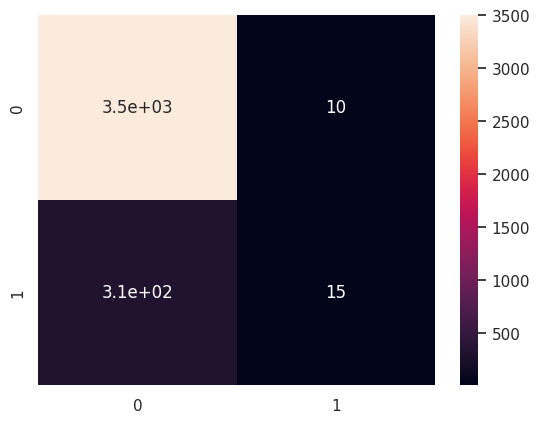

In [49]:
knn_clf = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')
knn_clf.fit(x_train, y_train)

# Predictions for test data
knn_pred = knn_clf.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, knn_pred))

Text(0, 0.5, 'True positive rate')

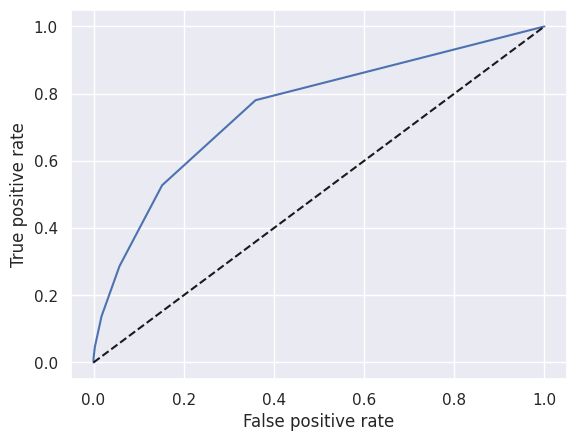

In [50]:
# plot roc curve for k-nearest neighbor
y_pred_proba = knn_clf.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 7: Linear Discriminant Analysis (LDA)

In [51]:
# Linear Discriminant Analysis (LDA)
# define model
model = LinearDiscriminantAnalysis()

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['solver'] = ['svd']

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(x_train, y_train)

# Predictions for test data
lda_pred = search.predict(x_test)

# Print confusion matrix
confusion_matrix(y_test, lda_pred)
print(classification_report(y_test,lda_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3510
           1       0.47      0.27      0.35       328

    accuracy                           0.91      3838
   macro avg       0.70      0.62      0.65      3838
weighted avg       0.90      0.91      0.90      3838



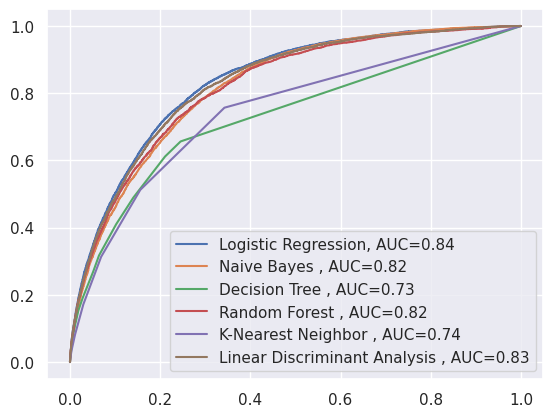

In [ ]:
# Comparison of All 7 Models

#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
y_pred_proba = grid_result.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(AUROC))

#fit naive bayes model and plot ROC curve
y_pred = bnb.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Naive Bayes , AUC="+str(AUROC))

#fit neural network model and plot ROC curve
#y_pred = hist.predict_proba(np.array(x_test))[:, 1]
#fpr, tpr, _ = roc_curve(y_test, y_pred)
#AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
#plt.plot(fpr,tpr,label="Gradient Boosting , AUC="+str(AUROC))

#fit decision tree model and plot ROC curve
y_pred = dt.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Decision Tree , AUC="+str(AUROC))


#fit random forest model and plot ROC curve
y_pred = rf_grid.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Random Forest , AUC="+str(AUROC))

#fit k-nearest neighbor  model and plot ROC curve
y_pred = knn_clf.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="K-Nearest Neighbor , AUC="+str(AUROC))

#fit linear discriminant analysis  model and plot ROC curve
y_pred = results.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Linear Discriminant Analysis , AUC="+str(AUROC))

#add legend
sns.set(rc={'figure.figsize':(8,6)})
plt.legend();


The accuracy score achieved using     Logistic Regression is: 91.64 %
The accuracy score achieved using     Naive Bayes is: 86.71 %
The accuracy score achieved using     Support Vector Machine is: 91.64 %
The accuracy score achieved using     K-Nearest Neighbors is: 91.49 %
The accuracy score achieved using     Decision Tree is: 91.52 %
The accuracy score achieved using     Random Forest is: 91.12 %
The accuracy score achieved using     Neural Network is: 90.76 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

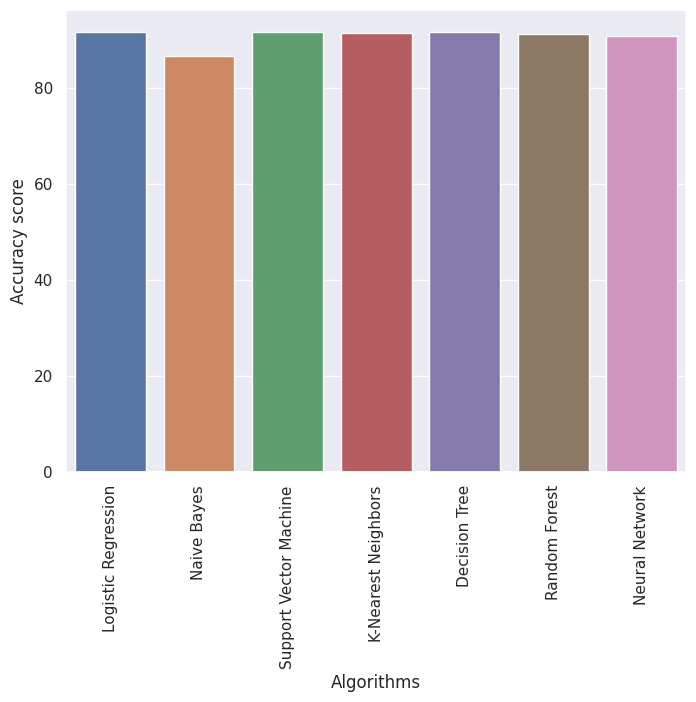

In [ ]:
# Accuracy score comparision
score_lr = round(accuracy_score(lr_pred,y_test)*100,2)
score_nb = round(accuracy_score(bnb_pred,y_test)*100,2)
score_nn = round(accuracy_score(nn_pred,y_test)*100,2)
score_dt = round(accuracy_score(dt_pred,y_test)*100,2)
score_rf = round(accuracy_score(rf_pred,y_test)*100,2)
score_knn = round(accuracy_score(knn_pred,y_test)*100,2)
score_lda = round(accuracy_score(lda_pred,y_test)*100,2)

#Output final score
scores = [score_lr,score_nb,score_nn,score_dt,score_rf,score_knn,score_lda]
algorithms = ["Logistic Regression",
              "Naive Bayes",
              "Support Vector Machine",
              "K-Nearest Neighbors",
              "Decision Tree",
              "Random Forest",
              "Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using\
     "+algorithms[i]+" is: "+str(scores[i])+" %")

sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt. xticks(rotation='vertical')

sns.barplot(x=algorithms,y=scores)


<Axes: ylabel='Feature'>

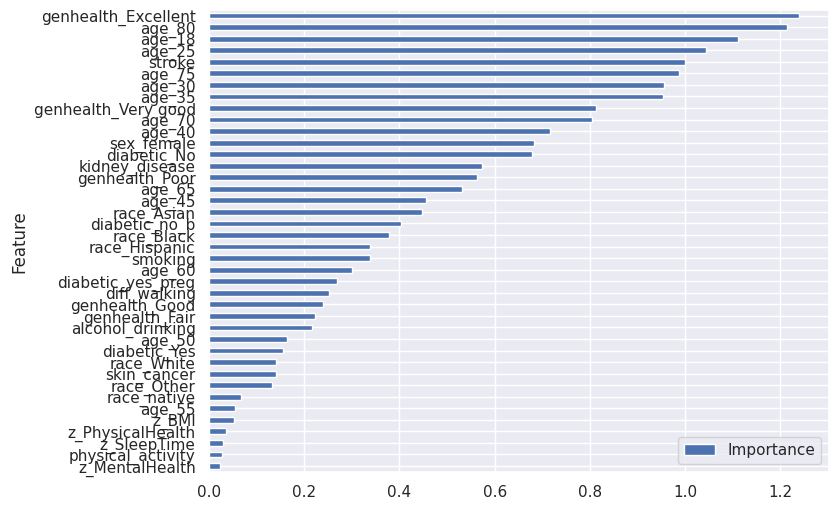

In [ ]:
# Feature Importance for Best Model (Logistic Regression)

logr = linear_model.LogisticRegression( C = 0.01, penalty ='l2',
                                       solver = 'liblinear')
logr.fit(x_train,y_train)

# get importance
coefficients = logr.coef_[0]
feature_importance = pd.DataFrame({'Feature': x_train.columns,
                                   'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance',
                                                    ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh',
                        figsize=(8, 6))


## References

kandel, I. (2020). The effect of batch size on the generalizability of the convolutional neural networks on a histopathology dataset.https://www.sciencedirect.com/science/article/pii/S2405959519303455#:~:text=In%20practical%20terms%2C%20to%20determine,advantage%20of%20the%20GPUs%20processing.